# Bifurcation Diagram and Phase Space Plots for a DDP

## Create useful functions for finding $\theta(t)$ at each period

Copy the functions from our previous notebook that we can use to investigate the nature of the damped driven pendulum for various driving forces.

In [1]:
%matplotlib notebook

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit

In [11]:
from IPython.display import display, Markdown, Latex

In [12]:
from vpython import * #yes, I know I'm not supposed to do this; in fact, VPython uses gamma, so I can't

Define a function that returns the derivatives in our model.

In [13]:
def model_pendulum(y, t): # y=[theta,omega]; function returns [dtheta/dt, domega/dt]    
    theta = y[0]
    omega = y[1]
    dtheta_dt = omega
    domega_dt = omega_0**2*gam*np.cos(omega_d*t) - omega_0**2*np.sin(theta)-2*beta*omega
    
    return np.array([dtheta_dt, domega_dt])

In [14]:
def run_pendulum(g=0.2, bet=3/4*np.pi, theta_i=0, omega_i=0, t_total = 10):
    
    global gam, beta, omega_0, omega_d

    omega_d = 2*np.pi
    omega_0 = 1.5*omega_d
    beta = bet
    gam = g

    t = 0.0
    h = 0.001

    y0 = [theta_i, omega_i]
    tdata = []
    thetadata = []
    omegadata = []
    Fddata = []

    tdata.append(t)
    thetadata.append(theta_i)
    omegadata.append(omega_i)
    Fddata.append(gam*np.cos(omega_d*t))

    while t < t_total:
        #integrate
        y1 = ode.RK4n(model_pendulum, y0, t, h) #update y[n]

        for i in range(len(y1)): #reset y0 to the new vector
            y0[i] = y1[i]

        t = t + h #update clock

        tdata.append(t)
        thetadata.append(y1[0])
        omegadata.append(y1[1])
        Fddata.append(gam*np.cos(omega_d*t))

    return np.array(tdata), np.array(thetadata), np.array(omegadata), np.array(Fddata)

In [15]:
def plot_theta(t, theta):

    plt.figure()
    plt.plot(t,theta, 'b-', label='gamma = %.3f' % gam)
    plt.xlabel('t (s)')
    plt.ylabel('theta (rad)')
    plt.legend(loc='lower right')
    plt.show()

In [16]:
def animate_pendulum(tdata, thetadata, Fddata):
    
    theta_i=thetadata[0]
    omega_i=omegadata[0]

    scene = canvas()

    scene.background=color.white

    g = 0.8
    L = g/omega_0**2

    support = sphere(pos=vector(0,0,0), radius=L/40, color=color.orange)
    bob = sphere(pos=vector(L*np.sin(theta_i), -L*np.cos(theta_i),0), radius=L/10, color=color.yellow, make_trail=True)
    rod = cylinder(pos=support.pos, axis=bob.pos-support.pos, radius=L/70, color=color.black)
    
    gdisplay = graph(title='<b>theta(t)</b>', xtitle='<i>t</i> (s)', ytitle='<i>theta</i> (rad)', xmin=0, xmax=tdata[-1])
    
    theta_curve = gcurve(color=color.blue)

    scale=L/gam
    Fdarrow = arrow(pos=bob.pos, axis=scale*Fddata[0]*vector(np.cos(theta_i), np.sin(theta_i), 0), color=color.magenta)


    scene.waitfor("click")

    for i in range(len(thetadata)):
        rate(300)
        t = tdata[i]
        theta = thetadata[i]
        F = Fddata[i]

        bob.pos=vector(L*np.sin(theta), -L*np.cos(theta),0)

        rod.axis = bob.pos-support.pos

        Fdarrow.pos = bob.pos
        Fdarrow.axis = scale*F*vector(np.cos(theta), np.sin(theta), 0)
        
        theta_curve.plot(pos=[t,theta])

In [17]:
def get_fixed_points(g = 1.06): #return thetas at N integer times in the steady state
    
    t_total = 600
    N_last_periods = 100

    tdata, thetadata, omegadata, Fddata = run_pendulum(g, 3/4*np.pi, -np.pi/2, 0, t_total)

    times = np.arange(500,600,1)
    thetas = []

    for t in times:
        index = np.abs(tdata-t).argmin()
        thetas.append(thetadata[index])

    return thetas

## Bifurcation Diagram

## Exercises

### Exercise 1

To find the attractors, call `get_fixed_points()` for a particular gamma. Plot the values of $\theta$ vs. $\gamma$, and increase gamma.

- Our global variables are `global gam, beta, omega_0, omega_d`.
- Argument for `get_fixed_points()` is gamma. It returns an array of angles at equal time intervals (one period) after the initial transient.
- Use $\theta_i = -\pi/2$ and $\omega = 0$.

Use a range of $1.0600<\gamma<1.070$ with increments of 0.0002. This will give five data points on your graph.

### Exercise 2

1. Use a range of $1.0600<\gamma<1.0870$. Change gamma in increments of 0.0001. Plot the fixed points as a function of gamma. **Note: this will take a very long time to run. It's a good excuse to learn techniques for speeding up Python.**

## Phase Plot

The phase space trajectory (or state space orbit) is the motion of the object in phase space (or state space). Phase space consists of the coordinates $\theta$ and $\omega$. The trajectory in phase space is plotted with $\omega$ on the vertical axis and $\theta$ on the horizontal axis.

### Create a function to make the phase space plot

In [28]:
def make_phase_plot(thetas, omegas):

    plt.figure()
    plt.plot(thetas,omegas, 'm-', linewidth=0.5,  label='gamma = %.3f' % gam)
    plt.xlabel('theta (rad)')
    plt.ylabel('omega (rad/s)')
    plt.legend(loc='lower right')
    plt.show()

### Nearly linear (small gamma)

$\gamma=0.1$. In the steady-state, this results in small angle oscillations around $\theta=0$. The phase space trajectory is an ellipse.

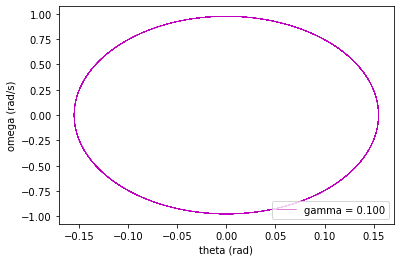

In [29]:
tdata, thetadata, omegadata, Fddata = run_pendulum(0.1, 3/4*np.pi, theta_i=-np.pi/2, omega_i=0, t_total = 30)

N_last=20*1000
lastthetas=thetadata[-N_last:]
lastomegas=omegadata[-N_last:]
make_phase_plot(lastthetas, lastomegas)

### Larger gamma, period one

$\gamma=0.9$. Note that the trajectory is not elliptical.

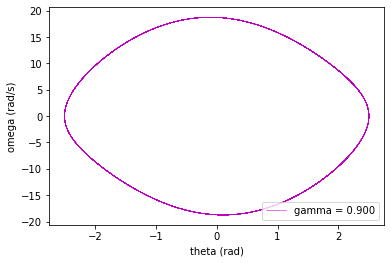

In [30]:
tdata, thetadata, omegadata, Fddata = run_pendulum(0.9, 3/4*np.pi, theta_i=-np.pi/2, omega_i=0, t_total = 30)

N_last=20*1000
lastthetas=thetadata[-N_last:]
lastomegas=omegadata[-N_last:]
make_phase_plot(lastthetas, lastomegas)

### Period Two

$\gamma=1.075$.

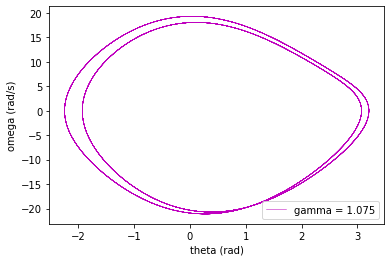

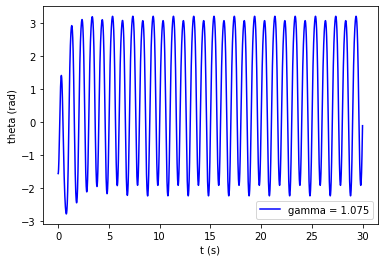

In [31]:
tdata, thetadata, omegadata, Fddata = run_pendulum(1.075, 3/4*np.pi, theta_i=-np.pi/2, omega_i=0, t_total = 30)

N_last=20*1000
lastthetas=thetadata[-N_last:]
lastomegas=omegadata[-N_last:]
make_phase_plot(lastthetas, lastomegas)

plot_theta(tdata, thetadata)

### Period Four

$\gamma=1.08$

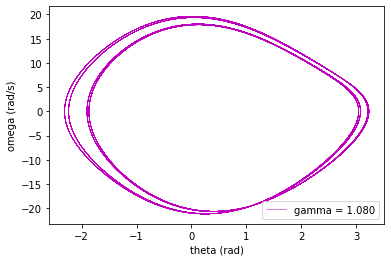

In [32]:
tdata, thetadata, omegadata, Fddata = run_pendulum(1.08, 3/4*np.pi, theta_i=-np.pi/2, omega_i=0, t_total = 200)

N_last=50*1000
lastthetas=thetadata[-N_last:]
lastomegas=omegadata[-N_last:]
make_phase_plot(lastthetas, lastomegas)

### High Gamma

$\gamma=1.4$

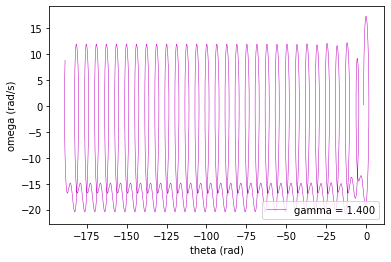

In [33]:
tdata, thetadata, omegadata, Fddata = run_pendulum(1.4, 3/4*np.pi, theta_i=-np.pi/2, omega_i=0, t_total = 30)

N_last=30*1000
lastthetas=thetadata[-N_last:]
lastomegas=omegadata[-N_last:]
make_phase_plot(lastthetas, lastomegas)

We want restrict $\theta$ to be from $\pi$ and $-\pi$. In other words, if the pendulum goes over the top, then we change the angle to a positive (or negative) angle.

$$\theta = \theta + 2\pi \quad \mathrm{if}\ \theta<-\pi; \qquad \theta = \theta - 2\pi \quad \mathrm{if}\ \theta>\pi $$

## Exercises

### Modify run_pendulum() to Wrap $\theta$

Test it with $\gamma=1.4$ again.